# Análisis inicial y trata de datos

En este documento realizaremos la parte de transformación de los datos de una ETL. Partimos del documento de tipo parquet proporcionado, el cual analizaremos para poder realizar las modificaciones necesarias para antes de cargar los datos a la base.

In [1]:
# Importamos las librerías necesarias
import pandas as pd # type: ignore
import numpy as np # type: ignore
# from src import funciones_soporte as fs
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
# Importamos el archivo con el que vamos a trabajar, que en este caso es un parquet. Para que funcione el read_parquet es necesario pasarle
# el parámetro ' engine = auto/pyarrow', ambos funcionan. En caso de que se use pyarrow será necesario realizar su instalaciñon previamnente en el entorno.
df_raw = pd.read_parquet("../data/reservas_hoteles.parquet", engine='auto')
df_raw.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid


In [3]:
# Creamos una copia de los datos originales
data = df_raw.copy()
data.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid


In [4]:
# función info
def info_df(dataframe):
    """
    Función que devuelve información general sobre el DatFrame que le pasemos.


    Args:
        df (DataFrame): DataFrame con información que queramos revisar

    Returns:
        DataFrame: DataFrame con información general sobre las columnas del DataFrame que se le ha pasado a la función: tipo de datos, número de
        registros, número de valores nulos, porcentaje de los valores nulos sobre el total
    """
    info_df = pd.DataFrame()
    info_df["Tipo_dato"] = dataframe.dtypes
    info_df["numero_registros"] = [dataframe[elemento].value_counts().sum() for elemento in dataframe]
    info_df["Numero_nulos"] = round(dataframe.isnull().sum())
    info_df["%_nulos"] = round((dataframe.isnull().sum()/dataframe.shape[0])*100, 2)

    return info_df

In [5]:
# Información general del dataframe
info_df(data)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
id_reserva,object,15098,0,0.00
id_cliente,object,15098,0,0.00
nombre,object,15098,0,0.00
apellido,object,15098,0,0.00
mail,object,15098,0,0.00
competencia,bool,15098,0,0.00
fecha_reserva,object,15098,0,0.00
inicio_estancia,object,15023,75,0.50
final_estancia,object,15023,75,0.50
id_hotel,int64,15098,0,0.00


In [6]:
# Vamos a ver las columnas que tenemos en el dataframe
data.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'estrellas', 'ciudad'],
      dtype='object')

Tras realizar una overview de los datos recibidos observamos las siguientes casuísticas:
- Tenemos 14 columnas.
- Hay 3 columnas con información sobre fechas, las cuales son de tipo object. Será necesario modificar el tipo de dato de las mismas para poder trabajar más adelante.
- La columna competencia es un booleano, el cual habrá que ver con que se corresponde true y false. 
- Hay existencia de nulos en cuatro columnas:
    
    **a)** inicio_estancia: tenemos un 0,5% de nulos.
    
    **b)** fin_estancia: tenemos un 0,5% de nulos. Comprobaremos si son los mismos que la columna de inicio estancia, revisar casuística y tratar.
    
    **c)** precio_noche: hay un 34,6% de nulos, un valor significativo. Será necesario tratarlos.
    
    **d)** estrellas: hay un 34,26% de nulos, un valor significativo. Será necesario tratarlos. Asimismo el tipo de dato de esta columna es float. Podemos plantear modificarlo a tipo object, a un str. 

A continuación realizamos las modificaciones necesarias de las columnas para poder trabajar con ellas. 

## Búsqueda de duplicados completamente iguales 

In [7]:
# Vamos a revisar la existencia de duplicados completamente iguales en el df. Revisaremos si se pueden eliminar
data.duplicated().sum()
# Tenemos 98 elementos duplicados en total en el dataframe
data = data.drop_duplicates()

## Modificación columnas de fecha

In [8]:
# Creamos una función que nos modifica el tipo de dato de las columnas que le pasemos a tipo fecha
def data_fechas(dataframe, columnas):
    for col in columnas:
        dataframe[col] = pd.to_datetime(dataframe[col])
    return dataframe

In [9]:
# modificamos las columnas que queremos a tipo fecha
data = data_fechas(data, ["fecha_reserva", "inicio_estancia", "final_estancia"])

In [10]:
# comprobamos que la modificación se ha realizado de forma correcta
info_df(data)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
id_reserva,object,15000,0,0.00
id_cliente,object,15000,0,0.00
nombre,object,15000,0,0.00
apellido,object,15000,0,0.00
mail,object,15000,0,0.00
competencia,bool,15000,0,0.00
fecha_reserva,datetime64[ns],9828,5172,34.48
inicio_estancia,datetime64[ns],14925,75,0.50
final_estancia,datetime64[ns],14925,75,0.50
id_hotel,int64,15000,0,0.00


## Columna valores booleanos

Observamos que tenemos una columna que hace referencia a la competencia del grupo, que contiene valores booleanos (True/False). Entendemos que los valores que se corresponden con True, hacen referencia a hoteles que son de la competencia, y los que se corresponden con False, hacen referencia a hoteles del grupo.

`Hoteles de la competencia (col True)`

Estas columnas entendemos que se consideran como competencia del grupo, por lo que nos falta información de las mismas.

Tenemos valores nulos en este caso en las columnas de inicio y fin de estancia (23 en cada una), los cuales se corresponden en ambas columnas con los mismos clientes/reservas. Asimismo hay valores nulos en la columna de precio de noche (5172), que entendemos que se corresponde con los valores nulos de los hoteles de los cuales no tenemos estrellas (nulos en columna estrellas). Existen valores nulos en la columna de fecha de reserva, de la cual no tenemos ninguna información al respecto. Por otro lado no tenemos los nombres de estos hoteles, sino que están puestos en el dataframe como espacios en blanco.

Para tratar estos datos realizaremos un scrapeo de los nombres de los hoteles correspondientes, sus estrellas y el precio por noche de cada uno. Una vez hayamos obtenido la información necesaria, les asignaremos un id de hotel para poder trabajar en el dataframe. Para rellenar los valores nulos de la columna de fecha de reserva de estos hoteles haremos uso de la fecha en la que realicemos el scrapeo.

Tenemos valores duplicados en la columna de id de cliente. Estos se corresponden con diferentes clientes. Podemos tener en cuenta que un cliente se puede meter en su cuenta, y reservar por otra persona, poniendo su id de cliente, pero el nombre y correo de la persona de la reserva, explicando así el duplicado de id de cliente. Será necesario tratar esta casuística, asignando un id de cliente único en función de los correos.

Observamos que todas las estancias se han realizado entre el 01/03/2025 y el 02/03/2025. Podemos considerar rellenar los valores que no tenemos de las mismas con esas fechas.

In [11]:
# Filtramos por los valores que son True
hoteles_competencia = data[data["competencia"] == True]
hoteles_competencia.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
7,4d65096e-5f12-4ce7-9fd6-dd20e3cf5194,443a7307-2183-4051-b0bb-26f12fc1f478,Judith,Rivas,judith.rivas@example.com,True,NaT,2025-03-01,2025-03-02,131,NaN,,NaN,
9,458029ad-cc9b-4d85-8290-fec170bcc02d,e1a34338-a0aa-4b0e-96de-55f884eeb074,Adolfo,Cuervo,adolfo.cuervo@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
11,ac0fe86e-90a0-4fe6-a02e-6ea00e9a8621,2949fb90-39ab-4613-b4c1-e238bb56faf3,María Carmen,Navarro,maría carmen.navarro@example.com,True,NaT,2025-03-01,2025-03-02,103,NaN,,NaN,


In [12]:
# Comprobamos la información de este dataframe
info_df(hoteles_competencia)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
id_reserva,object,5172,0,0.00
id_cliente,object,5172,0,0.00
nombre,object,5172,0,0.00
apellido,object,5172,0,0.00
mail,object,5172,0,0.00
competencia,bool,5172,0,0.00
fecha_reserva,datetime64[ns],0,5172,100.00
inicio_estancia,datetime64[ns],5149,23,0.44
final_estancia,datetime64[ns],5149,23,0.44
id_hotel,int64,5172,0,0.00


In [13]:
# Comprobamos si los valores nulos de las columnas de inicio y final de estancia se corresponden con los mismos clientes en ambas columnas.
# hoteles_competencia[hoteles_competencia["inicio_estancia"].isnull()] == hoteles_competencia[hoteles_competencia["final_estancia"].isnull()] 

In [14]:
# Vamos a comprobar la información de la fecha de reserva, para ver si todos los valores son nulos
hoteles_competencia["fecha_reserva"].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [15]:
# Vamos a comprobar que valores tenemos en la columna de inicio de estancia
hoteles_competencia["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [16]:
# Vamos a comprobar que valores tenemos en la columna de final de estancia
hoteles_competencia["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [17]:
# Comprobamos los nombres de los hoteles de la competencia
hoteles_competencia["nombre_hotel"].unique()

array([''], dtype=object)

In [18]:
# Comprobamos los id de hotel de la competencia
hoteles_competencia["id_hotel"].unique()

array([113, 194, 131, 114, 103, 181, 128, 186, 135, 117])

In [19]:
# Vamos a revisar que no haya valores duplicados iguales en el dataframe
hoteles_competencia.duplicated().sum()

np.int64(0)

Vamos a revisar los valores duplicados por id de reserva, id de cliente y mail.

In [20]:
# Revisamos duplicados por id de reserva, los cuales no deberían existir
hoteles_competencia["id_reserva"].duplicated().sum()

np.int64(0)

In [21]:
# Revisamos duplicados por id de cliente, los cuales pueden existir, pero hay que revisar su casuística en caso de que existan
hoteles_competencia["id_cliente"].duplicated().sum()

np.int64(11)

In [22]:
# Revisamos duplicados de id de cliente
hoteles_competencia[hoteles_competencia["id_cliente"].duplicated()].head(2)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,346f2a77-33f4-4b2d-82f3-e8501e21b28d,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
1333,35888670-8393-4a86-b10f-42d8cc0cc558,bfbb9754-fcab-4580-bb2a-9ab295149227,Teodora,Seco,teodora.seco@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,


In [23]:
# Vamos a comprobar algún caso concreto
hoteles_competencia[hoteles_competencia["id_cliente"] == "bfbb9754-fcab-4580-bb2a-9ab295149227"]
# Observamos que son clientes diferentes con el mismo id.

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
889,a5d8e23d-782b-4bd9-875e-a0b7f1c9a57c,bfbb9754-fcab-4580-bb2a-9ab295149227,Esperanza,Marquez,esperanza.marquez@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1333,35888670-8393-4a86-b10f-42d8cc0cc558,bfbb9754-fcab-4580-bb2a-9ab295149227,Teodora,Seco,teodora.seco@example.com,True,NaT,2025-03-01,2025-03-02,128,NaN,,NaN,


In [24]:
# Revisanos los duplicados por mail
hoteles_competencia["mail"].duplicated().sum()

np.int64(12)

In [25]:
# Revisamos duplicados de mail
hoteles_competencia[hoteles_competencia["mail"].duplicated()].head(2)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
5818,fd938a82-5eb8-4b7f-9cc4-dae5926cd5d8,dde043ea-8b87-4984-819d-2b238d044183,Guadalupe,Dueñas,guadalupe.dueñas@example.com,True,NaT,2025-03-01,2025-03-02,117,NaN,,NaN,
6361,803667c4-11a8-4b67-a37a-30fc7046d96c,ababd266-e747-42f8-a528-4107b99aaa38,Juan Antonio,Benavides,juan antonio.benavides@example.com,True,NaT,2025-03-01,2025-03-02,181,NaN,,NaN,


In [26]:
# Vamos a comprobar algún caso concreto
hoteles_competencia[hoteles_competencia["mail"] == "guadalupe.dueñas@example.com"]
# Observamos que es el mismo cliente con ids diferentes.

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
5040,fb89dec9-e602-4899-a1a9-8c31c414a8d0,2f0184ca-528d-4629-b79a-4be3d8ca092d,Guadalupe,Dueñas,guadalupe.dueñas@example.com,True,NaT,2025-03-01,2025-03-02,186,NaN,,NaN,
5818,fd938a82-5eb8-4b7f-9cc4-dae5926cd5d8,dde043ea-8b87-4984-819d-2b238d044183,Guadalupe,Dueñas,guadalupe.dueñas@example.com,True,NaT,2025-03-01,2025-03-02,117,NaN,,NaN,


`Hoteles del grupo (col False)`

Estas columnas entendemos que no se consideran como competencia del grupo, por lo que tenemos casi toda la información de las mismas. Observamos que los id de hotel están asignados de manera incorrecta, ya que hay diferentes hoteles con el mismo id, cuando el id debería ser un identificador único de cada hotel. Será necesario modificarlos y asignar un id unico a cada hotel.

Tenemos valores nulos en este caso en las columnas de inicio, fin de estancia y precio de noche (52 en cada una), los cuales se corresponden en todas las columnas con los mismos clientes. El precio lo rellenaremos calculando la media/mediana de los hoteles correspondientes. Observamos que todas las estancias se han realizado entre el 01/03/2025 y el 02/03/2025, por lo que podemos considerar rellenar los valores que no tenemos de las mismas con esas fechas. 

Tenemos duplicados en las columnas de id de cliente (178), los cuales se corresponden con mismos clientes, que tienen diferentes ids de reserva.  Podemos tener en cuenta que un cliente se puede meter en su cuenta, y reservar por otra persona, poniendo su id de cliente, pero el nombre y correo de la persona de la reserva, explicando así el duplicado de id de cliente. Será necesario tratar esta casuística, asignando un id de cliente único en función de los correos.

In [27]:
# Filtramos por las columnas que contienen False.
hoteles_grupo = data[data["competencia"] == False]
hoteles_grupo.head()

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,6ec4d7d2-e382-47cc-94f6-c647577d4035,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,aed17fe8-eb18-4f69-bf08-df1afdc339c3,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,710a2fbb-264f-426a-aa66-f8fffd146a2d,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
5,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,df42ae3d-0b9b-4c06-b22e-939323833ef8,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,36,85.45,Hotel Puerta del Cielo,5.0,Madrid
6,99c3dc4f-663c-45f7-849a-ac9313f3746a,a16a9d83-6888-4947-a7ab-ed41203e347c,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,43,309.80,Hotel Encanto Real,1.0,Madrid


In [28]:
# Comprobamos la información de este dataframe
info_df(hoteles_grupo)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
id_reserva,object,9828,0,0.00
id_cliente,object,9828,0,0.00
nombre,object,9828,0,0.00
apellido,object,9828,0,0.00
mail,object,9828,0,0.00
competencia,bool,9828,0,0.00
fecha_reserva,datetime64[ns],9828,0,0.00
inicio_estancia,datetime64[ns],9776,52,0.53
final_estancia,datetime64[ns],9776,52,0.53
id_hotel,int64,9828,0,0.00


In [29]:
# Comprobamos si los valores nulos de las columnas de inicio y final de estancia se corresponden con los mismos clientes en ambas columnas.
# df_false[df_false["inicio_estancia"].isnull()] == df_false[df_false["final_estancia"].isnull()]

In [30]:
# Vamos a comprobar que valores tenemos en la columna de inicio de estancia
hoteles_grupo["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [31]:
# Vamos a comprobar que valores tenemos en la columna de final de estancia
hoteles_grupo["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [32]:
# Vamos a revisar los nombres de los hoteles y su id_correspondiente
hoteles_grupo[["id_hotel","nombre_hotel"]].sort_values("id_hotel")

,id_hotel,nombre_hotel
69,2,Hotel Vista Alegre
14944,2,Hotel Puerta del Cielo
36,2,Hotel Luz de Madrid
12769,2,Hotel Camino del Sol
6398,2,Hotel Encanto Real
...,...,...
1828,49,Hotel Sol y Luna
1825,49,Hotel Vista Alegre
1817,49,Hotel Los Almendros
13372,49,Hotel Jardines del Rey


Vamos a comprobar los valores duplicados por id de cliente e id de reserva.

In [33]:
# Revisamos duplicados por id de reserva, los cuales no deberían existir
hoteles_grupo["id_reserva"].duplicated().sum()

np.int64(0)

In [34]:
# Revisamos duplicados por id de cliente, los cuales pueden existir, pero hay que revisar su casuística en caso de que existan
hoteles_grupo["id_cliente"].duplicated().sum()

np.int64(80)

In [35]:
# Revisanos los duplicados por mail
hoteles_grupo["mail"].duplicated().sum()

np.int64(43)

In [36]:
# Vamos a revisar los duplicados por mail
hoteles_grupo[hoteles_grupo["mail"].duplicated()].head(2)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
3007,904807cd-f9de-4261-b2ef-905c818e5c28,1d97512a-8d30-43a2-9ee4-043b4107a1b1,Ceferino,Sosa,ceferino.sosa@example.com,False,2025-02-10,2025-03-01,2025-03-02,48,412.52,Hotel Jardines del Rey,1.0,Madrid
3089,5223c253-9e19-4fe7-bace-56e2d8f97141,7c72ec8f-aff0-4e75-a8a0-75dcbdf66c13,Sergio,Carrión,sergio.carrión@example.com,False,2025-02-12,2025-03-01,2025-03-02,47,287.07,Hotel Mirador Real,3.0,Madrid


In [37]:
# Vamos a comprobar algún caso en concreto
hoteles_grupo[hoteles_grupo["mail"] == "ceferino.sosa@example.com"]

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
204,f2945ede-3cbe-4da5-9783-bce3017dae6b,e103ca1d-9202-4d0a-8a72-8c12f9b1b0f0,Ceferino,Sosa,ceferino.sosa@example.com,False,2025-02-01,2025-03-01,2025-03-02,38,476.41,Hotel Jardines del Rey,2.0,Madrid
3007,904807cd-f9de-4261-b2ef-905c818e5c28,1d97512a-8d30-43a2-9ee4-043b4107a1b1,Ceferino,Sosa,ceferino.sosa@example.com,False,2025-02-10,2025-03-01,2025-03-02,48,412.52,Hotel Jardines del Rey,1.0,Madrid


# Columna de inicio y fin de estancia
En estas columnas hemos observado que todas las estancias son del fin de semana del 01/03/2025 y el 02/03/2025, por lo que rellenaremos los valores nulos de las mismas con esas fechas.


In [38]:
# Vamos a comprobar los valores únicos que tenemos en la columna de inicio de estancia.
data["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [39]:
# Vamos a comprobar los valores únicos que tenemos en la columna de final de estancia.
data["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00', 'NaT']
Length: 2, dtype: datetime64[ns]

In [40]:
# Realizamos la modificación de los valores nulos de las columnas reemplazándolas por los valores de las fechas del fin de semana correspondientes
data["inicio_estancia"] = data["inicio_estancia"].fillna("2025-03-01")
data["final_estancia"] = data["final_estancia"].fillna("2025-03-02")

In [41]:
# Comprobamos que la modificación se ha realizado correctamente
data["inicio_estancia"].unique()

<DatetimeArray>
['2025-03-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [42]:
# Comprobamos que la modificación se ha realizado correctamente
data["final_estancia"].unique()

<DatetimeArray>
['2025-03-02 00:00:00']
Length: 1, dtype: datetime64[ns]

In [43]:
# Vamos a comprobar que los nulos han desaparecido de las columnas
info_df(data)

,Tipo_dato,numero_registros,Numero_nulos,%_nulos
id_reserva,object,15000,0,0.00
id_cliente,object,15000,0,0.00
nombre,object,15000,0,0.00
apellido,object,15000,0,0.00
mail,object,15000,0,0.00
competencia,bool,15000,0,0.00
fecha_reserva,datetime64[ns],9828,5172,34.48
inicio_estancia,datetime64[ns],15000,0,0.00
final_estancia,datetime64[ns],15000,0,0.00
id_hotel,int64,15000,0,0.00


# Modificación de los id de cliente
Como hemos observado, tenemos valores duplicados en los id de cliente, haciendo referencia a los siguientes errores: 
- Clientes con diferente nombre y mismo id
- Clientes con igual nombre pero diferente id

A continuación modificaremos los id de cliente en función del correo, que es el identificador único de cada cliente en este caso, tras el id. 

In [44]:
# Vamos a revisar los valores únicos en la columna de id de cliente
data["id_cliente"].unique()

array(['346f2a77-33f4-4b2d-82f3-e8501e21b28d',
       '6ec4d7d2-e382-47cc-94f6-c647577d4035',
       'aed17fe8-eb18-4f69-bf08-df1afdc339c3', ...,
       'e89751f4-3621-4636-81d3-90e2baa709cb',
       'c4117358-fd89-44cd-b388-4ec6d3538c72',
       'f97ec0a6-6fb7-401e-83fa-5fb3957ee02b'],
      shape=(14847,), dtype=object)

In [45]:
# Creamos una función que nos permite realizar el cambio del id de cliente, creando uno nuevo que será seriado, y de tipo string
def cambio_id(dataframe, lista_columnas):
    
    lista = dataframe[lista_columnas[0]].unique()
    diccionario = {}
    conteo = 1
    for elemento in lista:
        if elemento == '':
            diccionario[elemento] = np.nan
        else:
            diccionario[elemento] = conteo
            conteo += 1

    dataframe[lista_columnas[1]] = dataframe[lista_columnas[0]].map(diccionario).astype(str)
    return dataframe

In [46]:
# Aplicamos la función y comprobamos que se ha realizado el cambio correctamente
columnas = ["mail", "id_cliente"]
cambio_id(data, columnas)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,1,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,
1,84fd6209-bd8d-4a92-bfe6-c68ee2c49271,2,Leonardo,Hierro,leonardo.hierro@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,
2,40c4cb55-d1f5-407b-832f-4756b8ff77b4,3,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,14,119.96,Hotel Monte Verde,1.0,Madrid
3,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,4,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,38,211.53,Hotel Brisas del Mar,5.0,Madrid
4,57d4515a-447d-4067-afcb-9bdcf4e4e915,5,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,35,378.37,Hotel Camino del Sol,1.0,Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,58acd6f3-7160-4973-b951-b14188937444,14901,Lorena,Román,lorena.román@example.com,False,2025-02-06,2025-03-01,2025-03-02,35,111.78,Hotel Jardines del Rey,1.0,Madrid
14996,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,14902,Toño,Narváez,toño.narváez@example.com,True,NaT,2025-03-01,2025-03-02,114,NaN,,NaN,
14997,af0f6afa-e7d2-410a-8cdd-5eb62b1e4788,14903,Nadia,Verdugo,nadia.verdugo@example.com,False,2025-02-11,2025-03-01,2025-03-02,47,442.96,Hotel Brisas del Mar,5.0,Madrid
14998,6d1f590c-ae87-4582-bc99-9b8cbf1d8e28,14904,Custodia,Marco,custodia.marco@example.com,True,NaT,2025-03-01,2025-03-02,194,NaN,,NaN,


In [47]:
data["id_cliente"].unique()

array(['1', '2', '3', ..., '14903', '14904', '14905'],
      shape=(14905,), dtype=object)

## Union datos competencia

Una vez hemos scrapeado la información de los hoteles de la competencia, les vamos a asignar un indice a cada valor y añadiremos la información correspondiente.

In [48]:
df_hoteles_competencia = pd.read_csv("../data/hoteles_competencia.csv")
df_hoteles_competencia

,nombre,estrellas,precio
0,ibis Styles Madrid Prado,3,170.0
1,ibis Madrid Centro las Ventas,2,172.0
2,ibis budget Madrid Vallecas,1,95.0
3,ibis Madrid Aeropuerto Barajas,2,116.0
4,ibis Madrid Alcorcon Tresaguas,2,90.0
5,ibis budget Madrid Aeropuerto,1,97.0
6,ibis Madrid Alcobendas,2,84.0
7,ibis budget Madrid Alcorcon Móstoles,2,77.0
8,ibis Madrid Fuenlabrada,2,86.0
9,ibis Madrid Alcala de Henares La Garena,3,83.0


In [49]:
data["id_hotel"][data["competencia"] == True].unique()

array([113, 194, 131, 114, 103, 181, 128, 186, 135, 117])

In [50]:
df_hoteles_competencia["id_hotel_competencia"] =  data["id_hotel"][data["competencia"] == True].unique()

In [51]:
df_hoteles_competencia

,nombre,estrellas,precio,id_hotel_competencia
0,ibis Styles Madrid Prado,3,170.0,113
1,ibis Madrid Centro las Ventas,2,172.0,194
2,ibis budget Madrid Vallecas,1,95.0,131
3,ibis Madrid Aeropuerto Barajas,2,116.0,114
4,ibis Madrid Alcorcon Tresaguas,2,90.0,103
5,ibis budget Madrid Aeropuerto,1,97.0,181
6,ibis Madrid Alcobendas,2,84.0,128
7,ibis budget Madrid Alcorcon Móstoles,2,77.0,186
8,ibis Madrid Fuenlabrada,2,86.0,135
9,ibis Madrid Alcala de Henares La Garena,3,83.0,117


In [52]:
data["nombre_hotel"].unique()

array(['', 'Hotel Monte Verde', 'Hotel Brisas del Mar',
       'Hotel Camino del Sol', 'Hotel Puerta del Cielo',
       'Hotel Encanto Real', 'Palacio del Sol', 'Hotel Jardines del Rey',
       'Hotel Las Estrellas', 'Gran Hotel Madrid', 'Hotel Torre Dorada',
       'Hotel Palacio Imperial', 'Hotel Luz de Madrid',
       'Hotel Los Almendros', 'Hotel Sol y Luna', 'Hotel Mirador Real',
       'Hotel Rincón Sereno', 'Hotel Vista Alegre', 'Hotel Costa Azul',
       'Hotel Maravilla Real'], dtype=object)

In [53]:
data[data["nombre_hotel"] == ''].head(1)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
0,5256cc90-139b-43d2-8ec5-412495d751cf,1,Feliciana,Cantón,feliciana.cantón@example.com,True,NaT,2025-03-01,2025-03-02,113,NaN,,NaN,


In [54]:
#for id in data["id_hotel"]:
 #   for id_comp in df_hoteles_competencia["id_hotel_competencia"]:
  #      if id == id_comp:
   #         data["nombre_hotel"] = data["nombre_hotel"].apply(lambda x: pd.Series(x.replace("", df_hoteles_competencia["nombre"])))

In [55]:
data["nombre_hotel"].unique()

array(['', 'Hotel Monte Verde', 'Hotel Brisas del Mar',
       'Hotel Camino del Sol', 'Hotel Puerta del Cielo',
       'Hotel Encanto Real', 'Palacio del Sol', 'Hotel Jardines del Rey',
       'Hotel Las Estrellas', 'Gran Hotel Madrid', 'Hotel Torre Dorada',
       'Hotel Palacio Imperial', 'Hotel Luz de Madrid',
       'Hotel Los Almendros', 'Hotel Sol y Luna', 'Hotel Mirador Real',
       'Hotel Rincón Sereno', 'Hotel Vista Alegre', 'Hotel Costa Azul',
       'Hotel Maravilla Real'], dtype=object)

## Precios de los hoteles del grupo

Si nos fijamos tenemos que los hoteles del grupo tienen diferentes precios. Vamos a calcular el precio medio de cada hotel para finalmente asignárselo. Antes de ello vamos a realizar un análisis estadístico de los precios para ver que valores son significativos. 

In [56]:
hoteles_grupo.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'estrellas', 'ciudad'],
      dtype='object')

In [69]:
hoteles_precio = hoteles_grupo[["nombre_hotel", "precio_noche"]]
df_estadisticos = hoteles_precio.groupby("nombre_hotel")["precio_noche"].describe() # es como pasarle una lista de funciones de agregacion con el agg
df_estadisticos["diferencia_media_mediana"] = df_estadisticos["mean"] - df_estadisticos["50%"]
df_estadisticos = df_estadisticos.reset_index()
df_estadisticos

,nombre_hotel,count,mean,std,min,25%,50%,75%,max,diferencia_media_mediana
0,Gran Hotel Madrid,515.0,264.967165,127.484497,50.27,155.8550,260.080,371.3550,498.59,4.887165
1,Hotel Brisas del Mar,532.0,275.225921,128.611561,50.43,158.2000,283.895,379.6600,499.73,-8.669079
2,Hotel Camino del Sol,514.0,269.998444,129.969971,51.09,158.7400,271.295,385.0225,499.27,-1.296556
3,Hotel Costa Azul,513.0,284.282963,130.441142,50.21,171.0500,281.760,398.5300,499.74,2.522963
4,Hotel Encanto Real,508.0,278.243996,131.498543,51.83,163.6500,274.610,394.8650,497.65,3.633996
5,Hotel Jardines del Rey,501.0,272.402335,133.457176,51.99,161.2900,265.120,389.9500,499.63,7.282335
6,Hotel Las Estrellas,510.0,271.706353,128.303521,50.19,166.0875,264.745,380.4075,499.82,6.961353
7,Hotel Los Almendros,531.0,273.762976,128.410778,50.29,160.1450,277.290,380.9200,499.29,-3.527024
8,Hotel Luz de Madrid,535.0,269.935607,129.630207,50.96,156.7400,267.190,384.3000,499.67,2.745607
9,Hotel Maravilla Real,472.0,284.402119,130.653204,52.05,167.2000,299.760,393.1225,499.70,-15.357881


Tras realizar los estadísticos podemos observar que no hay diferencias significativas entre la media y la mediana de cada hotel, por lo que, en principio, podríamos considerar que la media es un estadístico significativo de los datos, y podríamos usar esta medida de tendencia central para obtener un único precio por hotel.

Si observamos la desviación típica, vemos que los valores son por norma general elevados, considerando el caso en el que estamos. Observamos variaciones superiores a los 120 €, que en precios de habitaciones de hoteles se puede considerar como una diferencia elevada. 

Vamos a comprobar a continuación la existencia de outliers para ver si estos valores influyen en los estadísticos.

In [58]:
df = hoteles_grupo[hoteles_grupo["nombre_hotel"] == "Gran Hotel Madrid"]
df.head(2)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,estrellas,ciudad
15,5e3de36b-3d2f-4cef-98d3-df826c56a4b1,a263c6e8-96af-4720-96f0-04cfe51116c6,Ágata,Pinedo,ágata.pinedo@example.com,False,2025-02-01,2025-03-01,2025-03-02,47,358.07,Gran Hotel Madrid,2.0,Madrid
39,b4ec52c7-ac8d-4c68-93f2-56f80786978c,bb7d2b8a-223a-4da2-bf9f-4fc0f1330ee5,Telmo,Bartolomé,telmo.bartolomé@example.com,False,2025-02-05,2025-03-01,2025-03-02,6,368.52,Gran Hotel Madrid,2.0,Madrid


In [59]:
lista_graficos = hoteles_grupo.columns[10:12]
lista_graficos

Index(['precio_noche', 'nombre_hotel'], dtype='object')

In [60]:
nombre_hoteles = hoteles_grupo["nombre_hotel"].unique()
nombre_hoteles

array(['Hotel Monte Verde', 'Hotel Brisas del Mar',
       'Hotel Camino del Sol', 'Hotel Puerta del Cielo',
       'Hotel Encanto Real', 'Palacio del Sol', 'Hotel Jardines del Rey',
       'Hotel Las Estrellas', 'Gran Hotel Madrid', 'Hotel Torre Dorada',
       'Hotel Palacio Imperial', 'Hotel Luz de Madrid',
       'Hotel Los Almendros', 'Hotel Sol y Luna', 'Hotel Mirador Real',
       'Hotel Rincón Sereno', 'Hotel Vista Alegre', 'Hotel Costa Azul',
       'Hotel Maravilla Real'], dtype=object)

In [61]:
def graficos_estadisticos(dataframe, lista_columnas, lista_hoteles):
    """
    Genera gráficos estadísticos (histograma y boxplot) para analizar la distribución de precios 
    de diferentes hoteles en un conjunto de datos.
    
    Args:
        dataframe (pd.DataFrame): DataFrame que contiene los datos de los hoteles.
        lista_columnas (list): Lista con los nombres de las columnas a utilizar. 
            - lista_columnas[0]: Nombre de la columna de precios.
            - lista_columnas[1]: Nombre de la columna de hoteles.
        lista_hoteles (list): Lista con los nombres de los hoteles que se desean analizar.
        
    Returns:
        None: La función muestra los gráficos pero no devuelve ningún valor.

    """
    for hotel in lista_hoteles:
        df = dataframe[dataframe[lista_columnas[1]] == hotel]

        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
        
        sns.histplot(df[lista_columnas[0]],
                    bins = 50,
                    kde = True,
                    ax = axes[0])

        sns.boxplot(data = df,
                    x = lista_columnas[1],
                    y = lista_columnas[0],
                    ax = axes[1])

        axes[0].set_title(f"Histograma de precios del {hotel}", fontsize = 10)
        axes[0].set_xlabel("Precios", fontsize = 10)
        axes[0].set_ylabel("Frecuencia", fontsize = 10)
        axes[0].spines['right'].set_visible(False)
        axes[0].spines['top'].set_visible(False)

        axes[1].set_title(f"Boxplot de precios del {hotel}", fontsize = 10)
        axes[1].set_ylabel("Precios", fontsize = 10)
        axes[1].spines['right'].set_visible(False)
        axes[1].spines['top'].set_visible(False)

        plt.show()

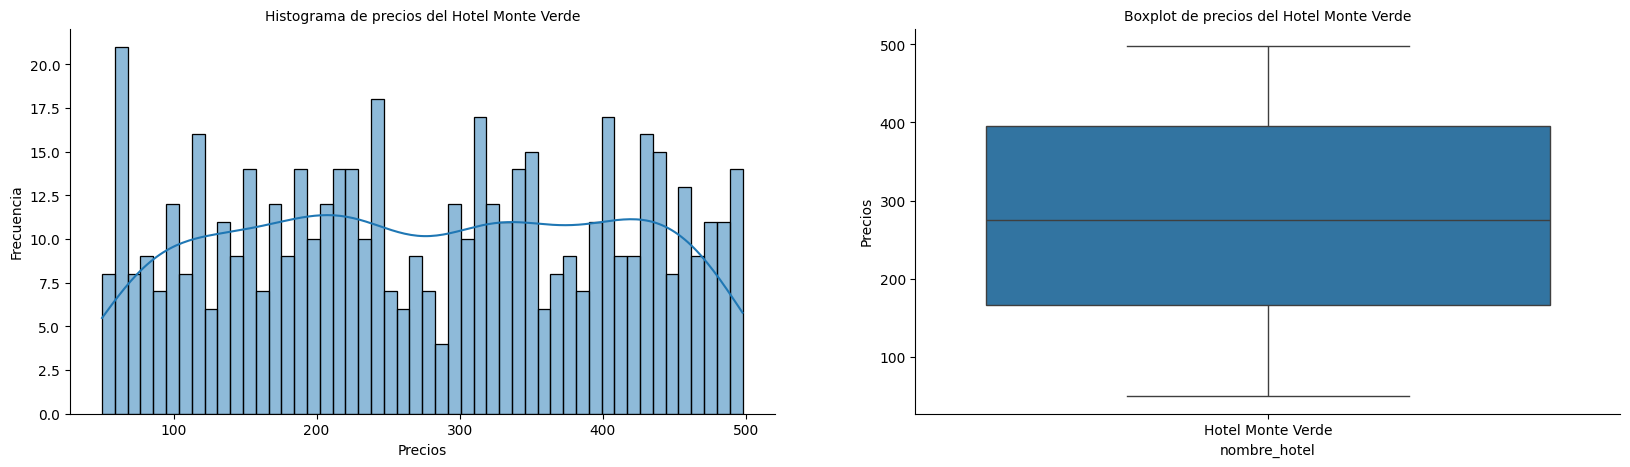

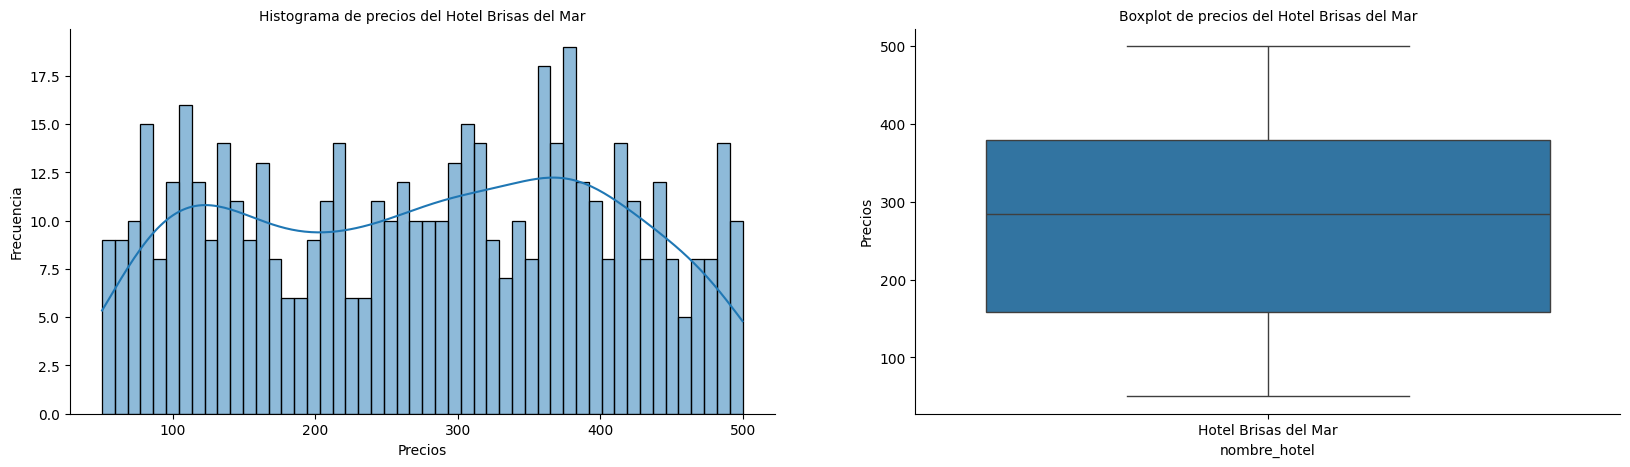

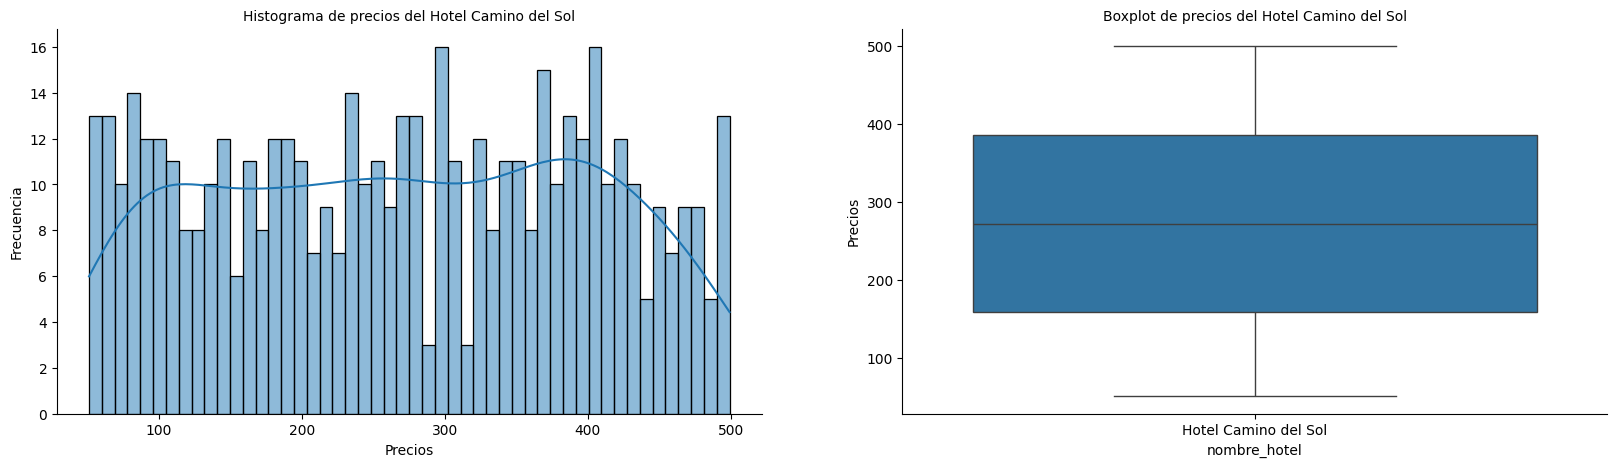

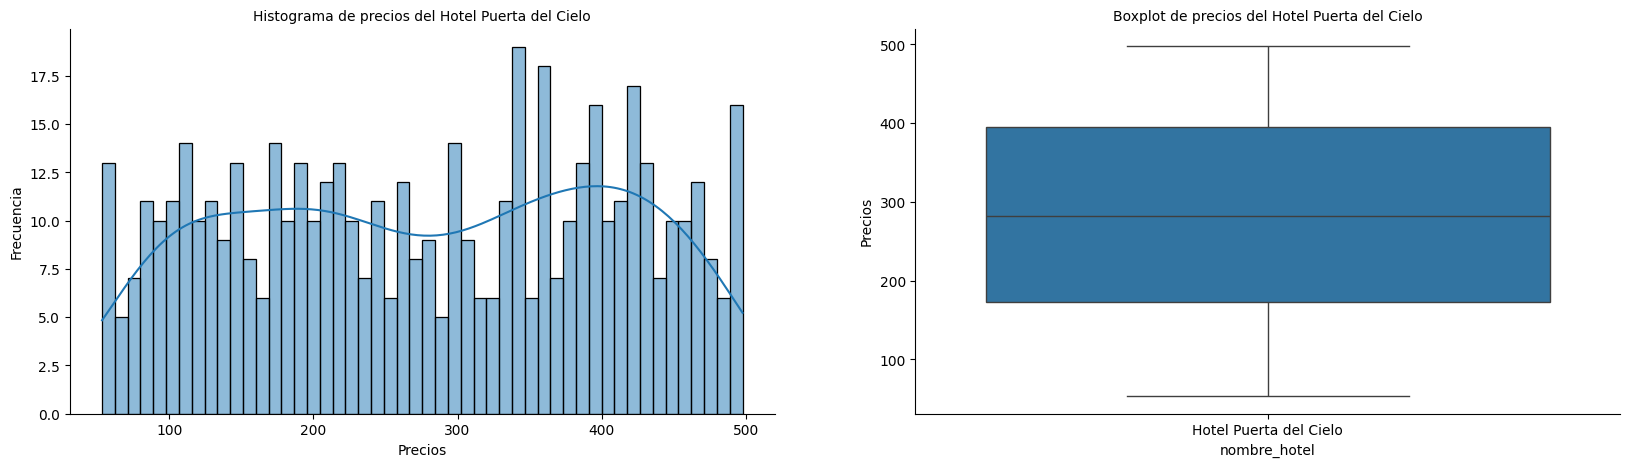

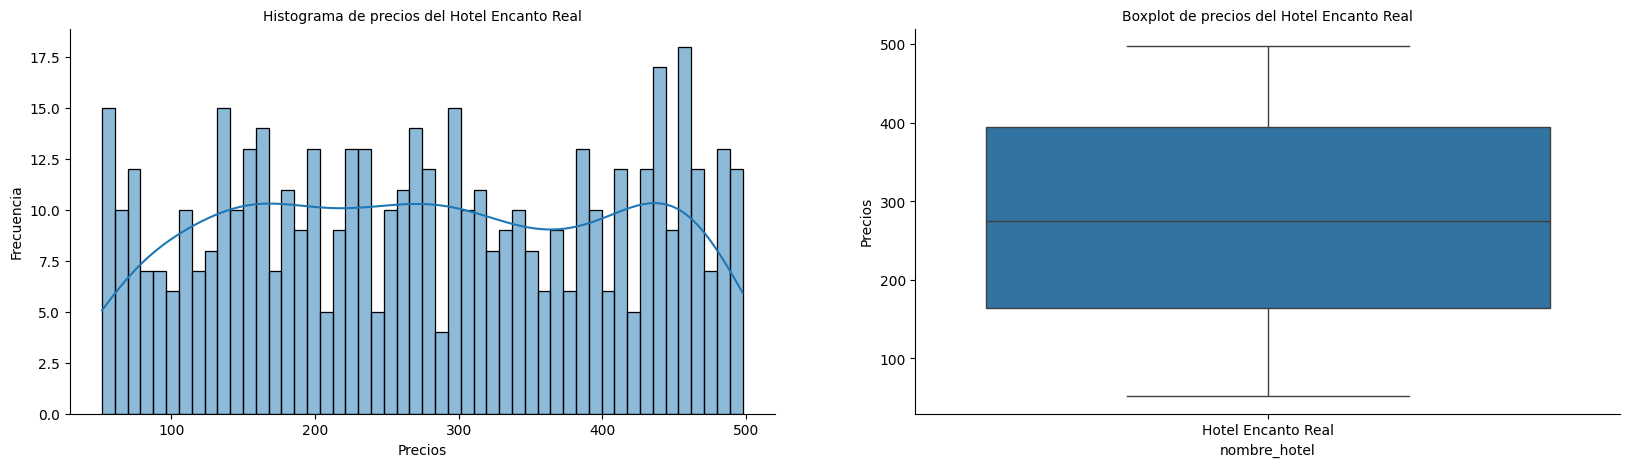

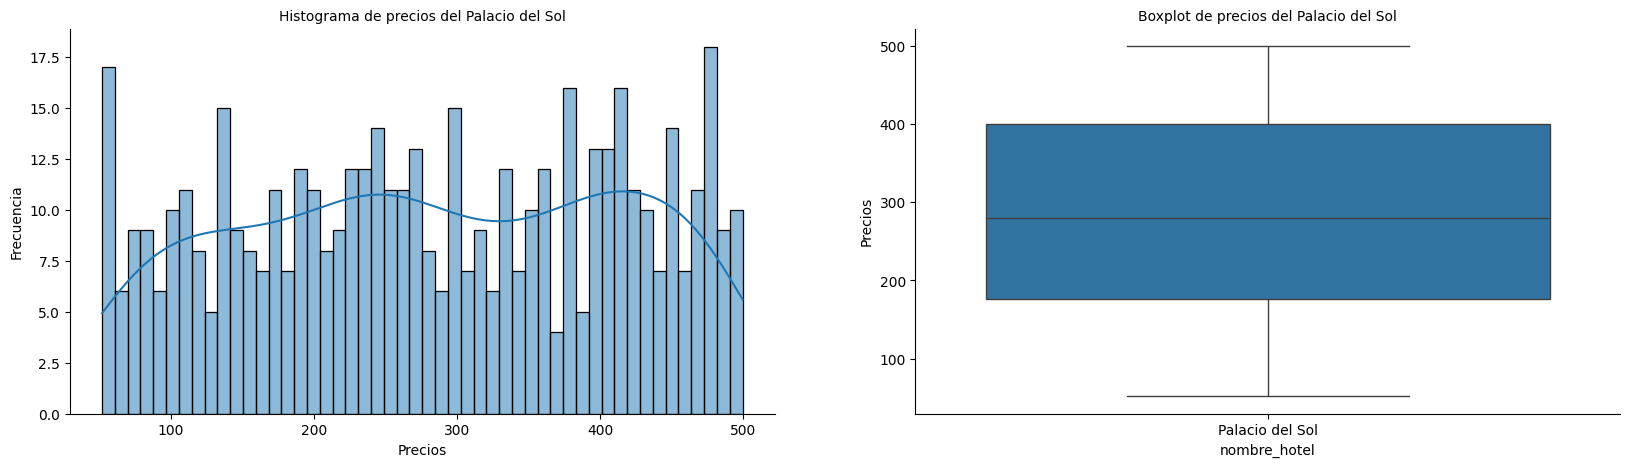

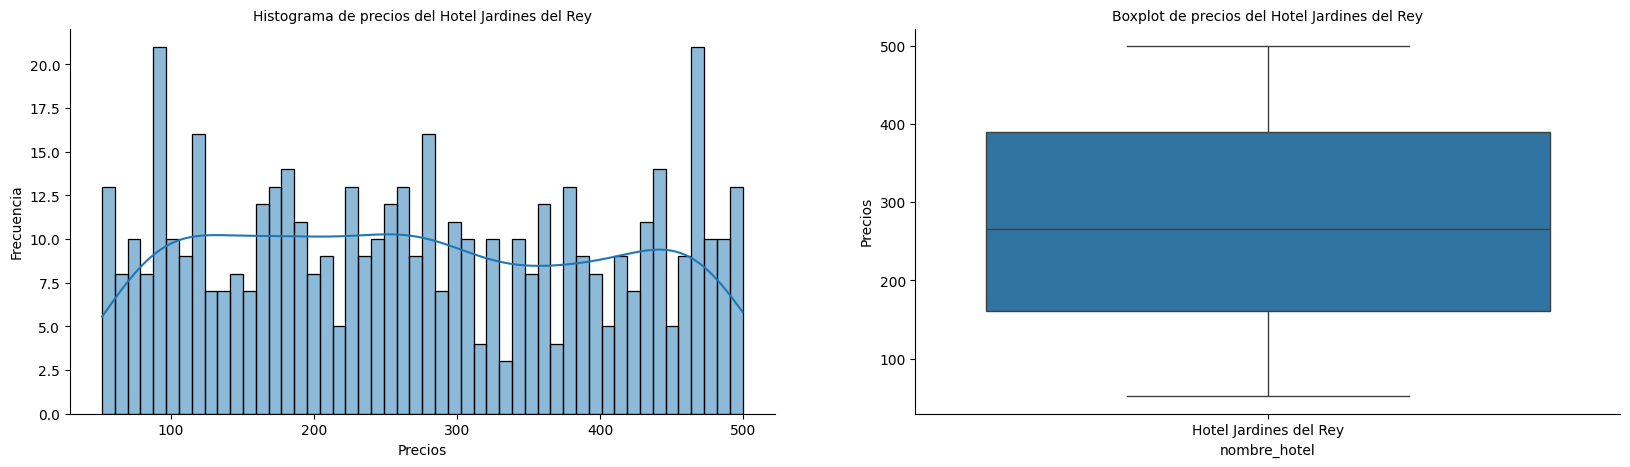

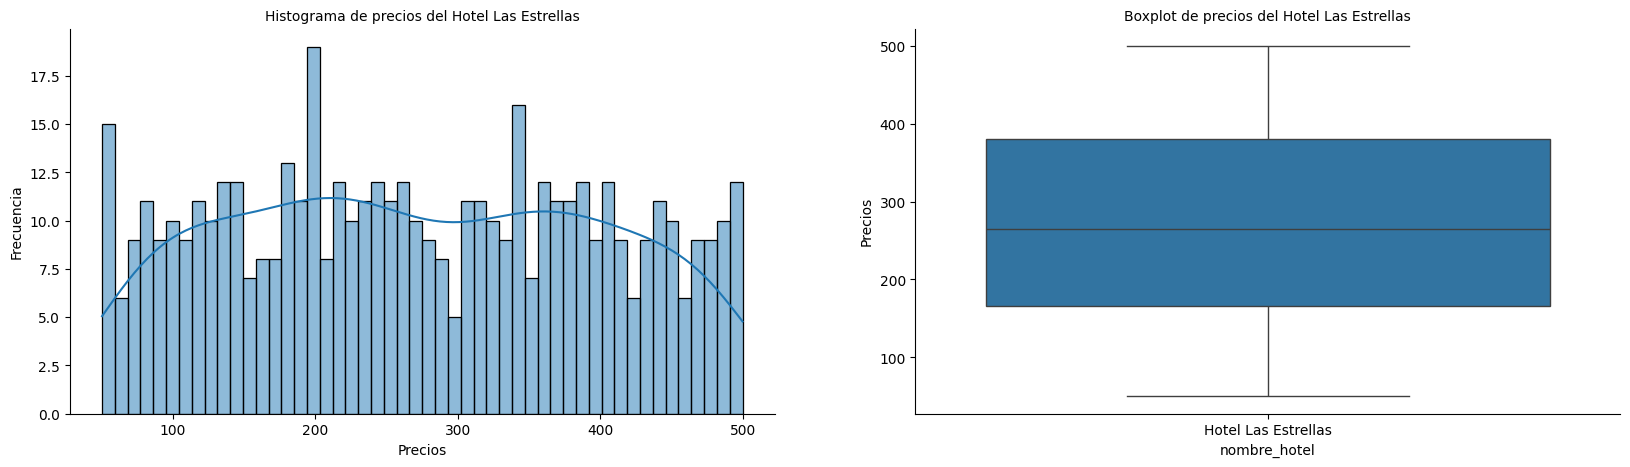

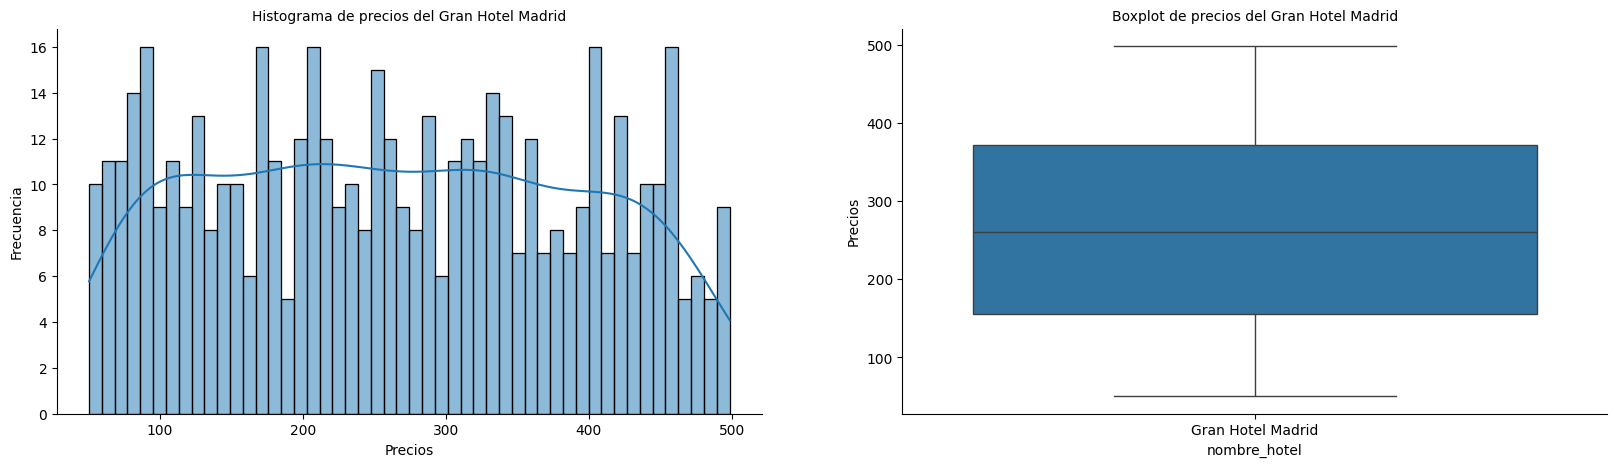

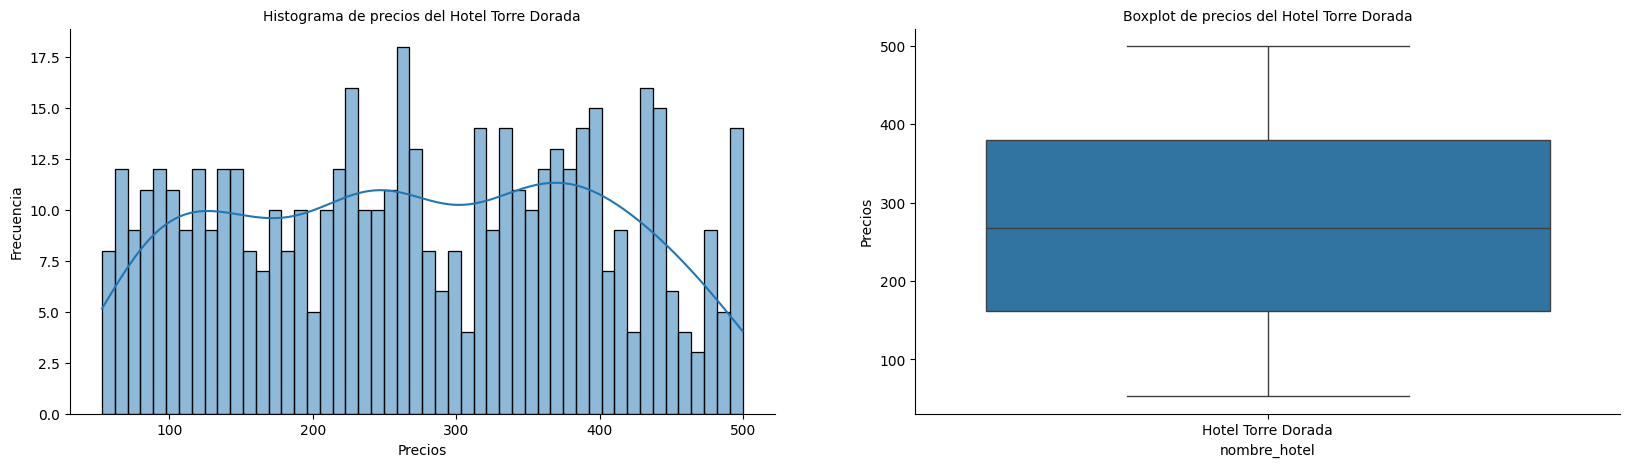

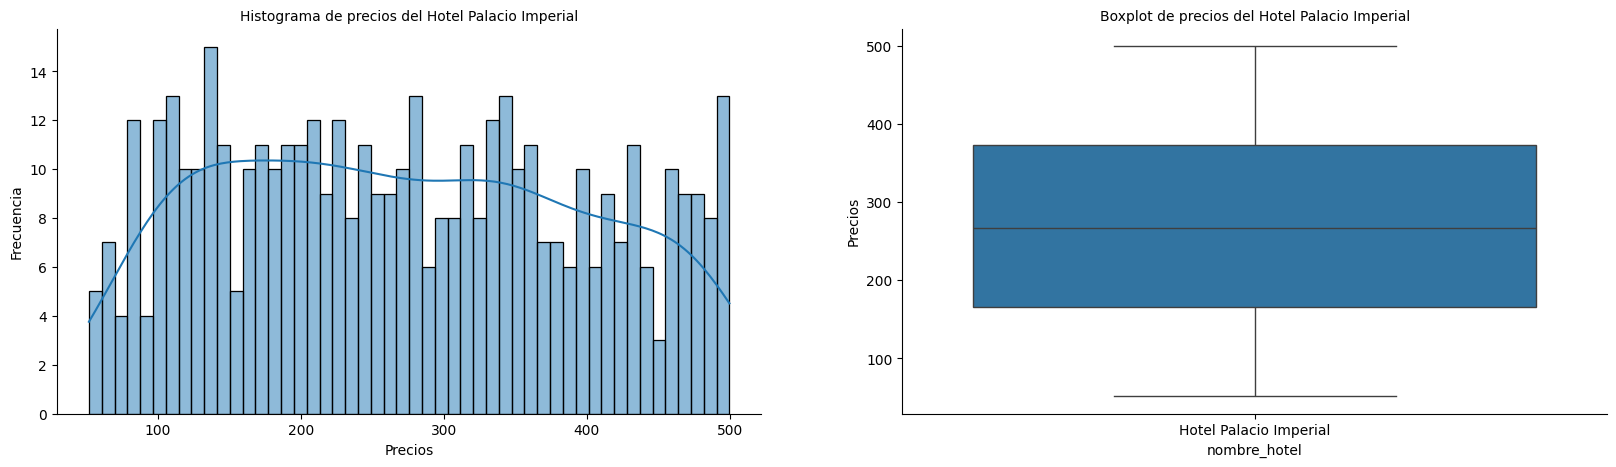

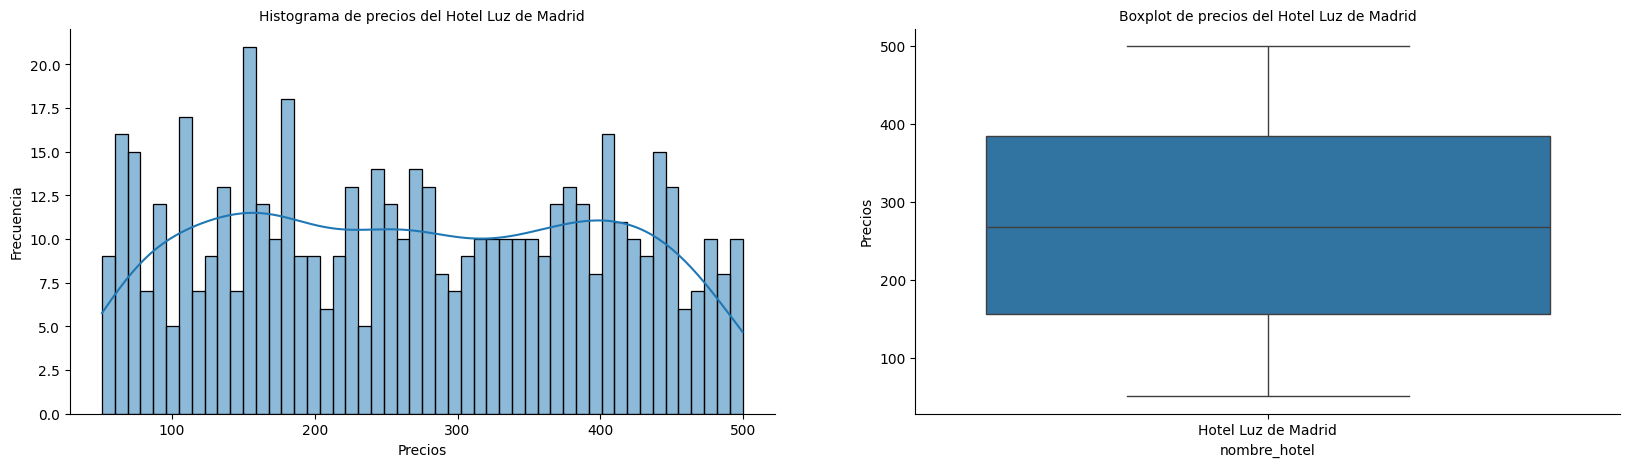

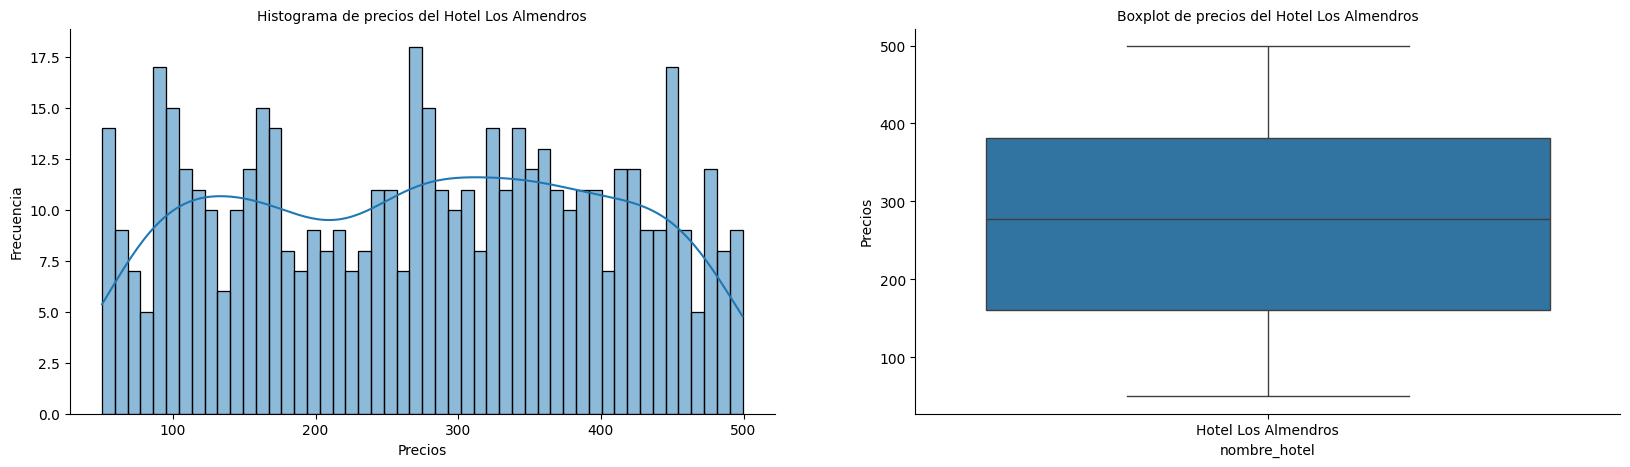

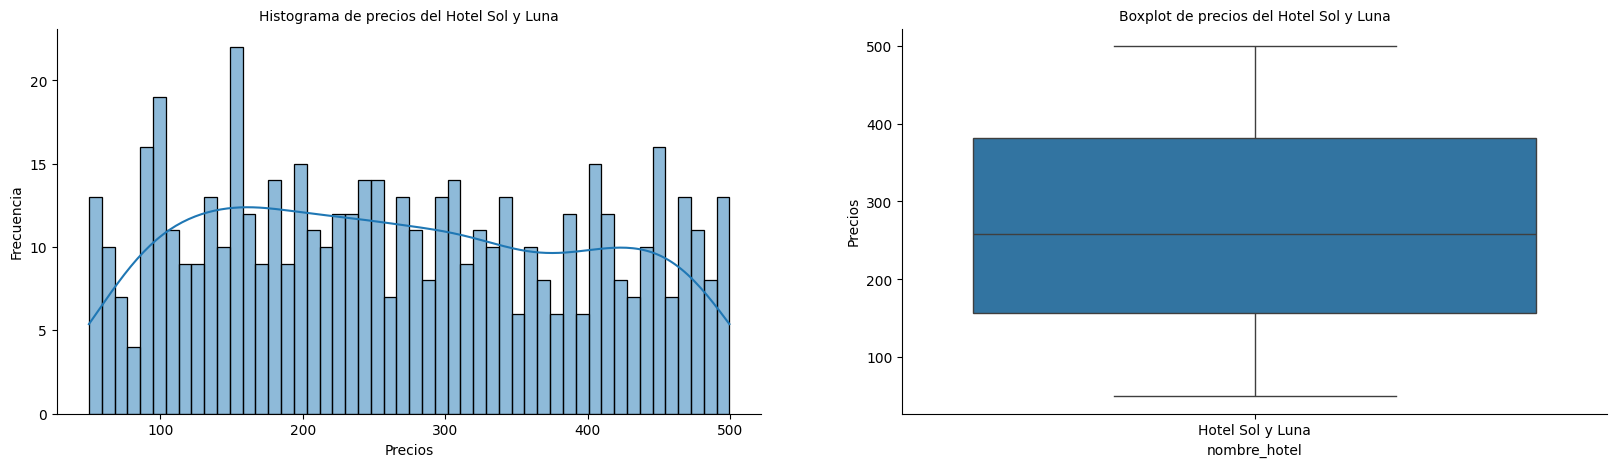

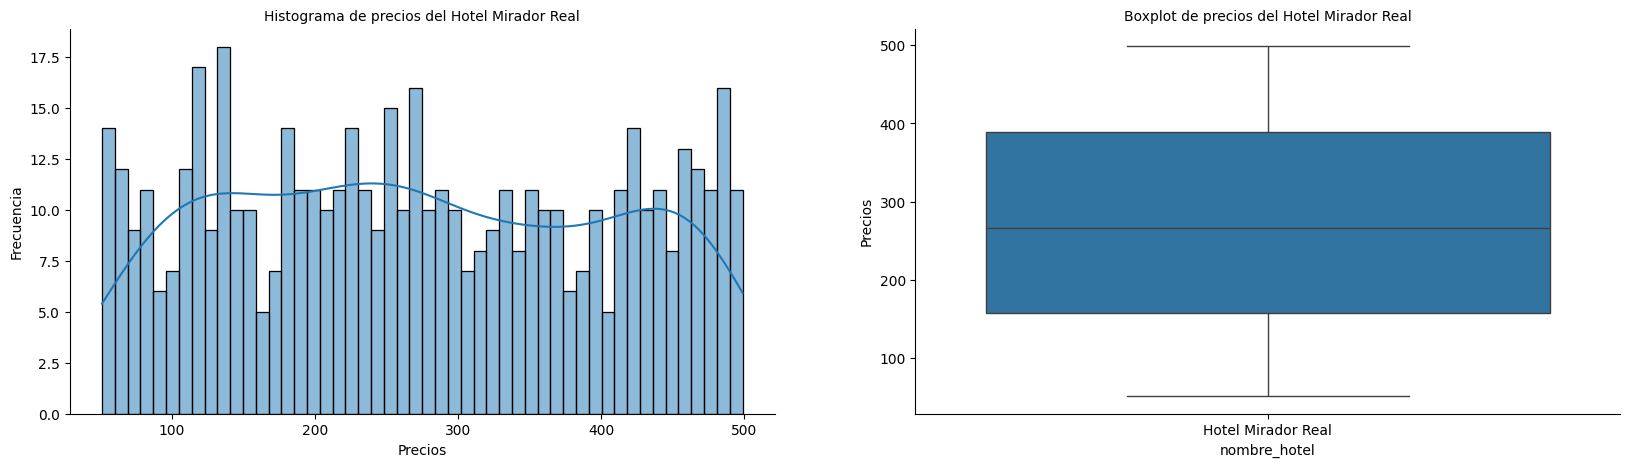

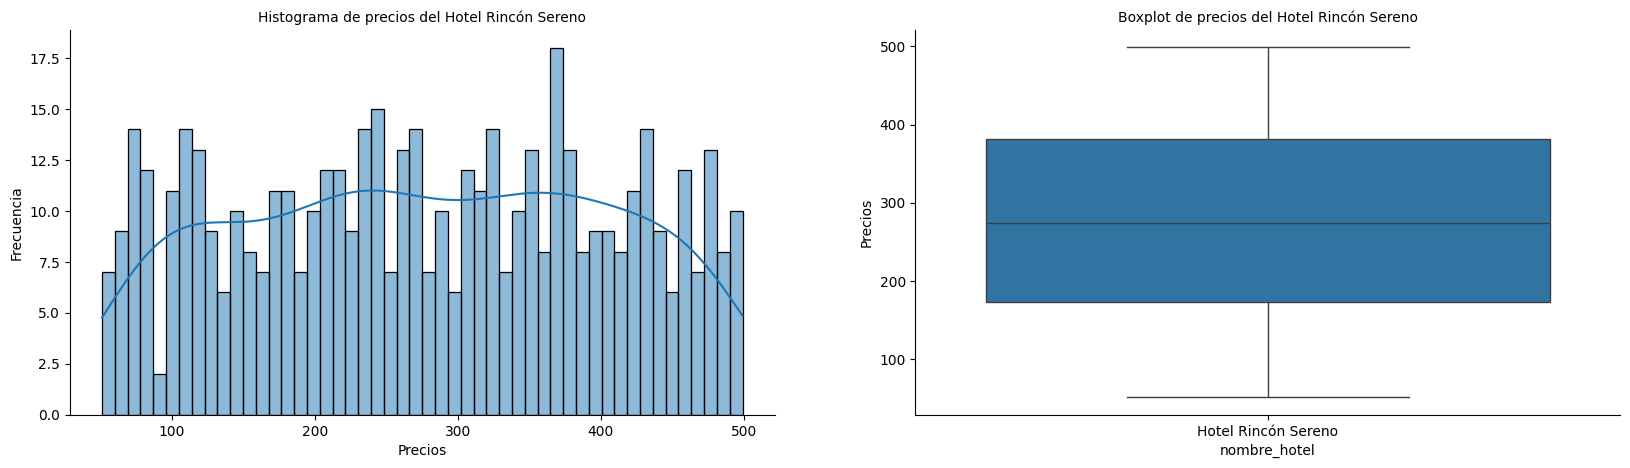

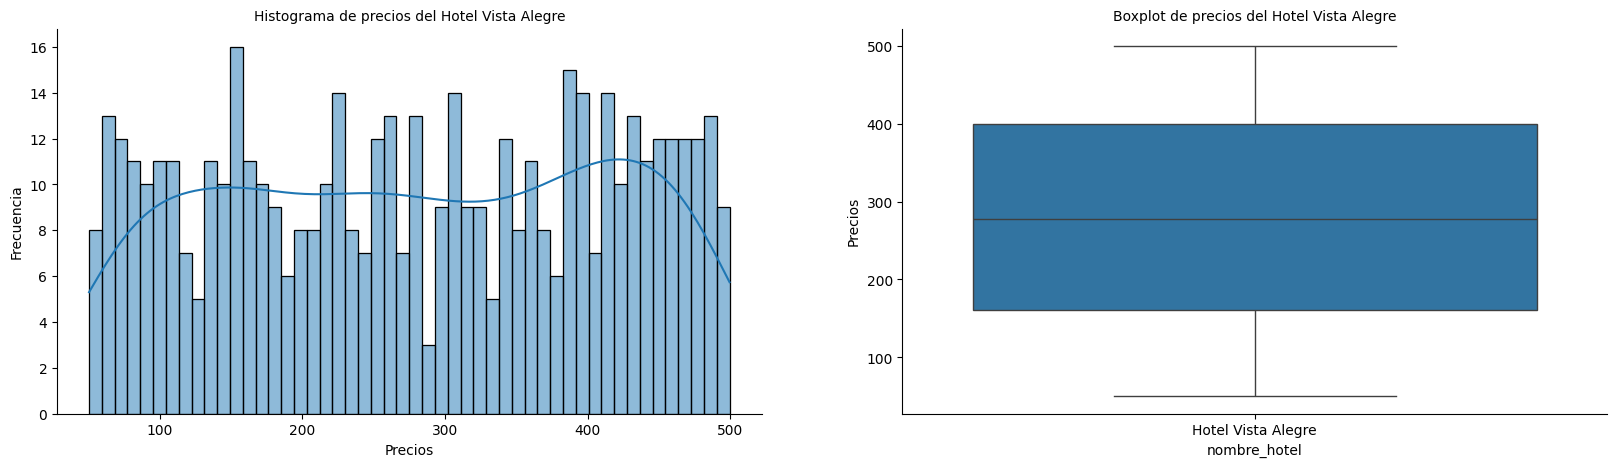

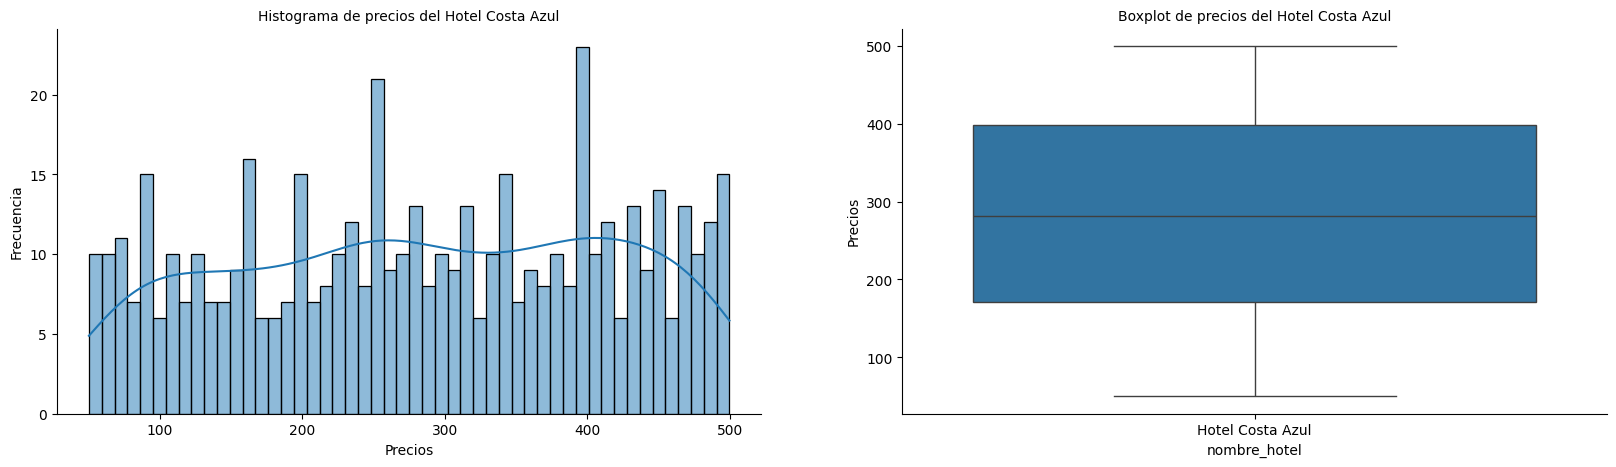

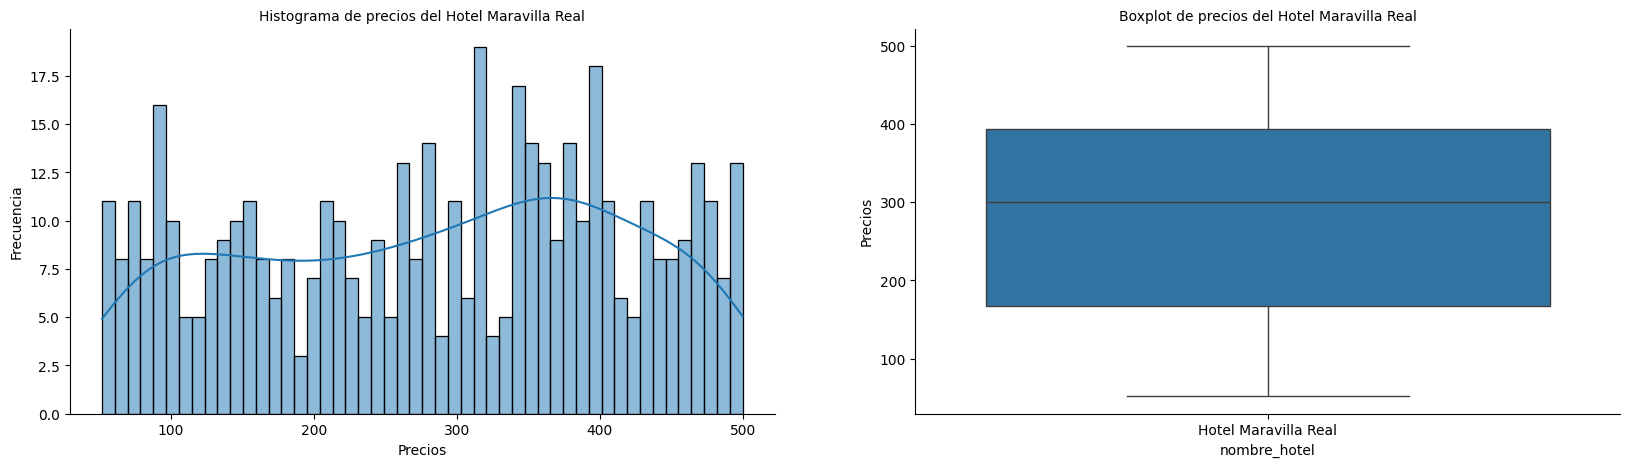

In [62]:
graficos_estadisticos(hoteles_grupo, lista_graficos, nombre_hoteles)

Podemos observar en los gráficos que representan las distribuciones de precios por hotel mediante un histograma y un diagrama de caja, que no hay existencia de outliers. Usaremos la media para calcular el precio único de cada hotel.

In [ ]:
# Cogemos el valor medio de cada hotel y lo guardamos en un diccionario para poder realizar la modificación ca ontinuación de los valores 
# de cada hotel en el dataframe de los hoteles de grupo

diccionario_hoteles_precios = dict(zip(df_estadisticos["nombre_hotel"], df_estadisticos["mean"]))
diccionario_hoteles_precios


{'Gran Hotel Madrid': 264.96716504854373,
 'Hotel Brisas del Mar': 275.2259210526316,
 'Hotel Camino del Sol': 269.99844357976656,
 'Hotel Costa Azul': 284.2829629629629,
 'Hotel Encanto Real': 278.24399606299215,
 'Hotel Jardines del Rey': 272.4023353293413,
 'Hotel Las Estrellas': 271.7063529411765,
 'Hotel Los Almendros': 273.7629755178908,
 'Hotel Luz de Madrid': 269.9356074766355,
 'Hotel Maravilla Real': 284.4021186440678,
 'Hotel Mirador Real': 273.2852741020794,
 'Hotel Monte Verde': 276.61238095238093,
 'Hotel Palacio Imperial': 272.2415151515151,
 'Hotel Puerta del Cielo': 280.1512428298279,
 'Hotel Rincón Sereno': 277.31882352941176,
 'Hotel Sol y Luna': 267.93135869565214,
 'Hotel Torre Dorada': 272.7331755424063,
 'Hotel Vista Alegre': 279.802141453831,
 'Palacio del Sol': 282.4921499013806}

In [78]:
data.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'estrellas', 'ciudad'],
      dtype='object')

In [79]:
data[["nombre_hotel", "precio_noche"]]

,nombre_hotel,precio_noche
0,,NaN
1,,NaN
2,Hotel Monte Verde,NaN
3,Hotel Brisas del Mar,NaN
4,Hotel Camino del Sol,NaN
...,...,...
14995,Hotel Jardines del Rey,NaN
14996,,NaN
14997,Hotel Brisas del Mar,NaN
14998,,NaN


# Modificación de los id de hotel
Como los id de hotel de los hoteles que pertenecen al grupo están repetidos, vamos a crear nuevos id asignados a cada hotel. 

In [ ]:
lista_hoteles = data["nombre_hotel"].unique()
lista_hoteles

array(['', 'Hotel Monte Verde', 'Hotel Brisas del Mar',
       'Hotel Camino del Sol', 'Hotel Puerta del Cielo',
       'Hotel Encanto Real', 'Palacio del Sol', 'Hotel Jardines del Rey',
       'Hotel Las Estrellas', 'Gran Hotel Madrid', 'Hotel Torre Dorada',
       'Hotel Palacio Imperial', 'Hotel Luz de Madrid',
       'Hotel Los Almendros', 'Hotel Sol y Luna', 'Hotel Mirador Real',
       'Hotel Rincón Sereno', 'Hotel Vista Alegre', 'Hotel Costa Azul',
       'Hotel Maravilla Real'], dtype=object)

In [ ]:
#columnas_modif = ["nombre_hotel", "id_hotel"]
#cambio_id(data, columnas_modif)

In [ ]:
data["id_hotel"].unique()

array([113, 194,  14,  38,  35,  36,  43, 131,   6, 114,   3, 103, 181,
        29,  47, 128,  27,  13,  28,  40, 186,   2,  48, 135,  15,  33,
       117,  49,  19])

In [ ]:
arch_limpio = data.to_csv("../data/reservas_hoteles_limpio.csv", index = False)
arch_limpio